# Support Vector Machines (SVM)
Hey there, hi there, ho there, dear reader! 
Today we will be implementing yet another classification model from Andrew Ng's Machine Learning course (https://www.coursera.org/learn/machine-learning), the support vector machine (SVM). SVMs can be used to create both linear and non-linear decision boundaries for our data. In the non-linear case, we will have to use the kernel trick, which is simply creating a function that remaps our data to probabilities; Andrew Ng calls the kernel a similarity function that measures the distance between examples. We will focus on the 2-dimensional case and draw a lot of pictures to get intuition, however, the SVM works just as well for higher dimensional problems, as we will show when we use SVMs to do email spam classification.

Let’s get started by importing our favorite data science libraries!

## Linear SVMs

In [61]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
#set default figure size
mpl.rcParams['figure.figsize'] = (12, 8)

Let's load up the first data set which is linearly separable.

In [62]:
data1 = loadmat('data/ex6data1.mat')
data1

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [63]:
y1 = data1['y']
X1 = data1['X']

print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


When possible, it's always good to write up a function to visualize your data. This is useful because we first of all want to be able to see what the data looks like and we want to reuse the function later whenever we can.

In [64]:
def plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos, 0], X[pos, 1], s = 50, c = 'k', marker = '+', linewidths = 1, label = 'Positive')
    plt.scatter(X[neg, 0], X[neg, 1], s = 50, c = 'y', marker= 'o', linewidths = 1, label = 'Negative')
    plt.legend()

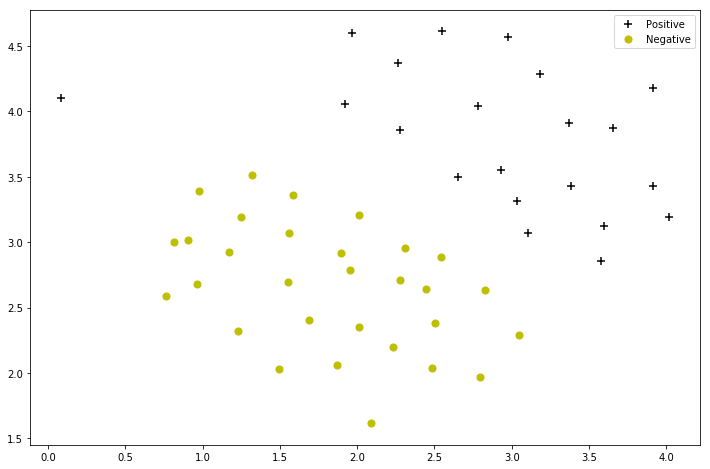

In [65]:
plotData(X1, y1)

Looks pretty simple, except keep your eye on that outlier in the upper left corner.

Now, the in-class explanation is little lacking in the technical information department, but what we want to do is minimize a cost/loss function, just like always. To this end, let us create the following composite function _f_: 
\begin{equation} f(g(w)) \end{equation}


where
\begin{equation} f(z)=\max(0,1-y\ z) \end{equation}
and 

\begin{equation} g(w)=\mathbf{x}\cdot \mathbf{w} \end{equation} 

We then need to take the partial derivative of our function in order to set the values of w such that we create the best possible hyperplane to separate our data classes. That is, to minimize (or maximize) a function, we need the function's partial derivatives. Via the chain rule we obtain:

\begin{equation} \frac{\partial}{\partial w_i} f(g(w))=\frac{\partial f}{\partial z} \frac{\partial g}{\partial w_i} \end{equation}

\begin{equation}\frac{\partial f(g(w))}{\partial w_i} =
\begin{cases}      
-y\ x_i &\text{if } y\ \mathbf{x}\cdot \mathbf{w} < 1 \\
0&\text{if } y\ \mathbf{x}\cdot \mathbf{w} > 1      
\end{cases}\end{equation}


The gradient is then the sum of all of our derivatives.

\begin{equation}
 \nabla (f(g(w)))= \frac{\partial{f(g(w))}}{\partial{w}}=\sum_i{\frac{\partial{f(g(w))}}{\partial w}} 
\end{equation}

Our composite function is known as the Hinge Loss and looks like this:

Text(0.5,1,'Hinge Loss if y = 1')

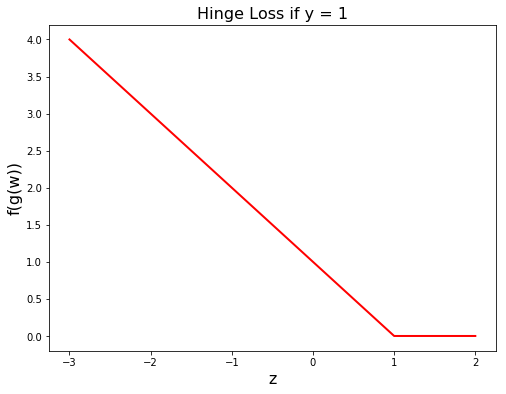

In [66]:
digits = np.arange(-3, 3, step=1)
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.plot(digits, np.where(digits < 1, 1 - digits, 0), color='red', lw = 2)
plt.xlabel('z',fontsize=16)
plt.ylabel('f(g(w))',fontsize=16)
plt.title('Hinge Loss if y = 1',fontsize=16)

Text(0.5,1,'Hinge Loss if y = 0')

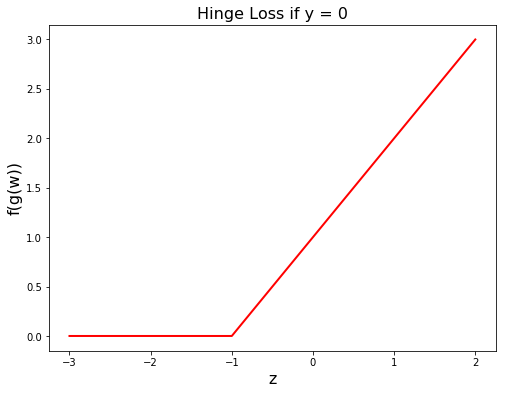

In [67]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.plot(digits, np.where(digits > -1, 1 + digits, 0), color='red', lw = 2)
plt.xlabel('z',fontsize=16)
plt.ylabel('f(g(w))', fontsize=16)
plt.title('Hinge Loss if y = 0',fontsize=16)

Lucky for us Andrew Ng says we're allowed to the use libraries in this excercise rather than coding the whole SVM from scratch, so let's use scikit learn with a linear kernal first! 

In [68]:
from sklearn.svm import SVC

In [69]:
clf1 = SVC(C = 1.0, kernel = 'linear')
clf1.fit(X1, y1.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
clf1.score(X1, y1) *100

98.0392156862745

In [71]:
clf2 = SVC(C = 100, kernel = 'linear')
clf2.fit(X1, y1.ravel())
clf2.score(X1, y1) * 100

100.0

Here, C is working as a regularization parameter, in fact, it is actually the inverse of lamdba from the previous exercises. A large C will mean we have lower bias and higher variance (overfitting), while a small C means higher bias and low variance (underfitting). This is makes sense as a C value of 1 did worse than a C value of 100.

Let's write up a plotting function so we can see our SVMs in action.

In [72]:
def plotSVC(svc, X, y, h = 0.02, pad = 0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.2)

    plotData(X, y)
   
    # stars denote the support vectors which create the decision boundary
    sv = svc.support_vectors_
    
    plt.scatter(sv[:, 0], sv[:, 1], c = 'k', marker = '*', s = 100, linewidths = '1')
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    print('Number of support vectors: ', svc.support_.size)

Number of support vectors:  12


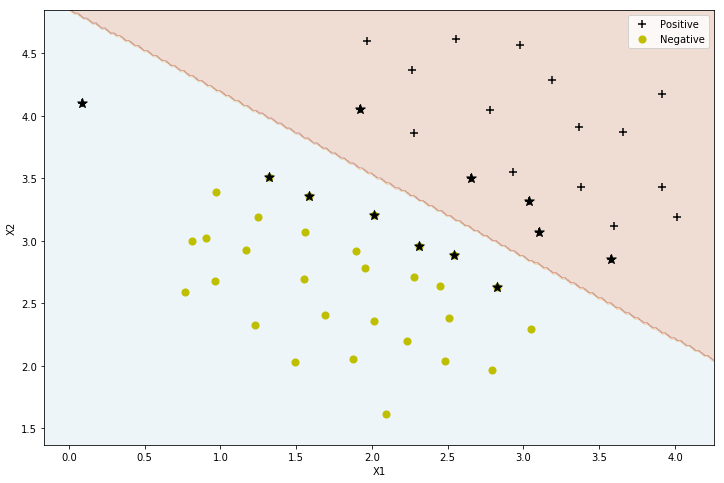

In [73]:
plotSVC(clf1, X1, y1)

Number of support vectors:  3


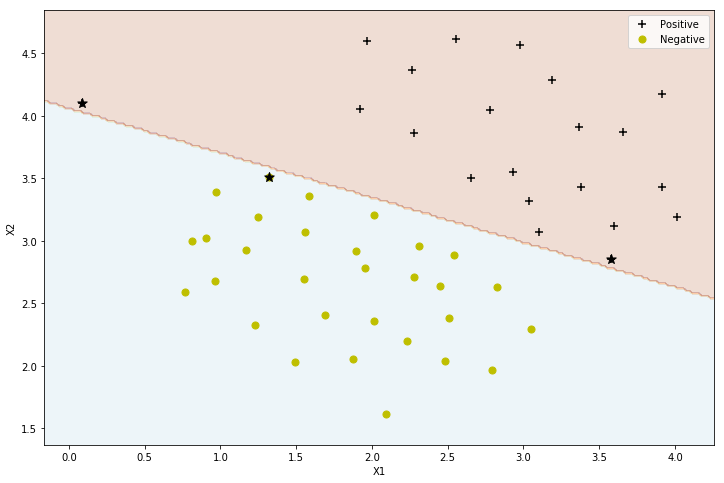

In [74]:
plotSVC(clf2, X1, y1)

The stars in the above plots denote our support vectors, that is, the data points that helped maximize the margin between our two classes and created the decision boundary. Notice that when C was low, we needed more support vectors and we were unable to correctly classify the outlier in the upper left corner. However, after cranking C up to 100, we succeeded, however, we are likely quite overfit. Such is life in machine learning.

We can visualize this another way:

Text(0.5,1,'Support Vector Machine (C = 1.0) Decision Confidence')

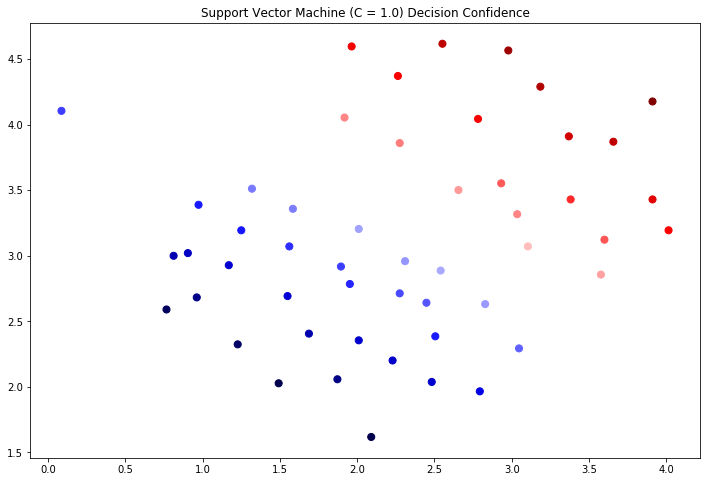

In [75]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X1[:, 0], X1[:, 1], s=50, c = clf1.decision_function(X1), cmap='seismic')
ax.set_title('Support Vector Machine (C = 1.0) Decision Confidence')

Text(0.5,1,'Support Vector Machine (C = 100) Decision Confidence')

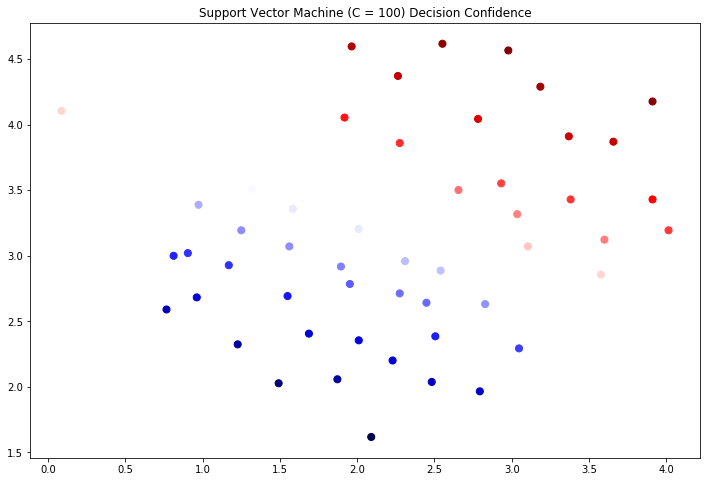

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X1[:, 0], X1[:, 1], s=50, c = clf2.decision_function(X1), cmap = 'seismic')
ax.set_title('Support Vector Machine (C = 100) Decision Confidence')

In the above plots, the darker blues and reds indicate the relative confidence of our classifer regarding where each class belongs. When the dots are close to the decision boundary, the colors are lighter because the classifer is less sure of its decision because the data points are more similar. Additionally, once again, our outlier changes its class and color depending on which value of C we choose.

## SVM with Gaussian Kernels

Now for nonlinear SVMS! In the next part of the exercise Andres NG says:
To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples,
(x(i); x(j)). The Gaussian kernel is also parameterized by a bandwidth parameter, sigma, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

We define the Gaussian Kernel as:

\begin{equation}
 K_{gaussian}(x^{(i)}, x^{(j)}) = exp\Big(-\frac{||x^{(i)}-x^{(j)}||^2}{2\sigma^2}\Big) =  exp\Big(-\frac{\sum_{k=1}^{n}(x^{(i)}_k - x^{(j)}_k)^2}{2\sigma^2}\Big)
\end{equation}

where the x's are vectors (our data) and sigma is an adjustable parameter. Note that when sigma is large, our kernel will vary more smoothly giving us a higher bias and lower variance (underfitting), while a small sigma means the features of our function will vary less smoothly and we will have lower bias and higher variance (overfitting).

We can code up this equation simple enough.

In [77]:
def gaussianKernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

Boom! Now we just need to pass it a few toy vectors and an arbitrary sigma value. Andrew Ng says we should expect to see our function yield a value of 0.324652, which is precisely what we get.

In [78]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

## Nonlinear SVMs

In the next part of the exercise, we need to use nonlinear kernels to separate the second data set, which, as you can see below, is clearly not linearly separable.

Let's load the data and take a look.

In [79]:
data2 = loadmat('data/ex6data2.mat')

In [80]:
y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


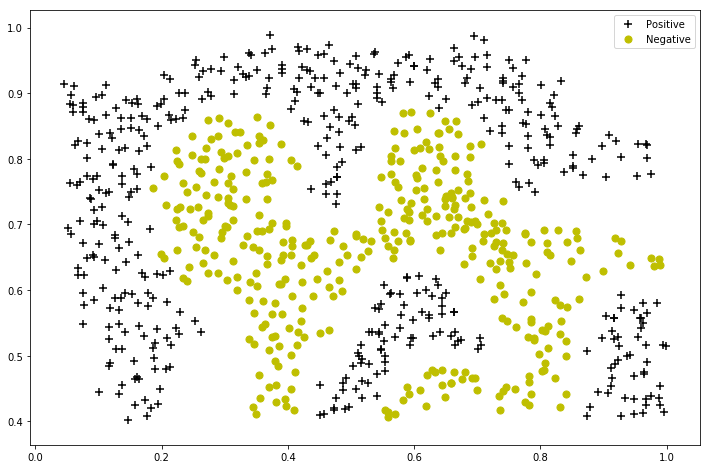

In [81]:
plotData(X2, y2)

Looks pretty tricky right? Have no fear, scikit learn can handle this no problem. Just a quick side note, gamma in the below code is sigma in the definition of our Gaussian kernel above.

Number of support vectors:  146


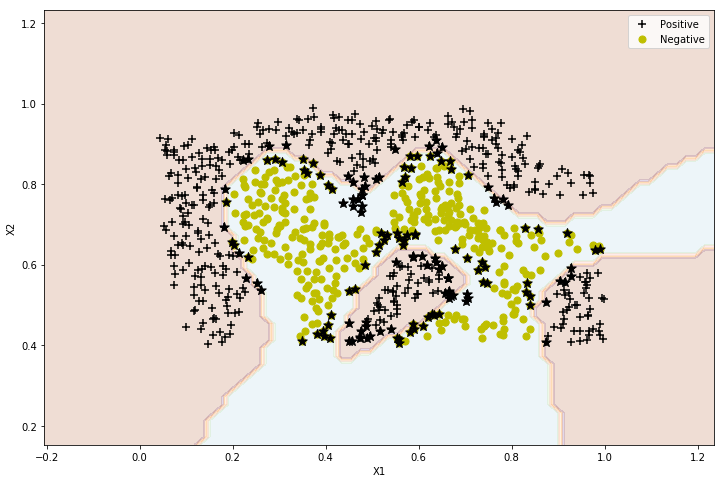

In [82]:
clf3 = SVC(C = 100, kernel = 'rbf', gamma = 10, probability = True)
clf3.fit(X2, y2.ravel())
plotSVC(clf3, X2, y2)

I arbitrarily chose the values of C and gamma (sigma) above. I encourage you to try difference values and see how the decision boundary and the support vectors change.

We can draw even prettier pictures and see how confident our SVM is by using the predict_proba functionality of scikit learn.

In [83]:
probs = clf3.predict_proba(X2)[:, 0].ravel()

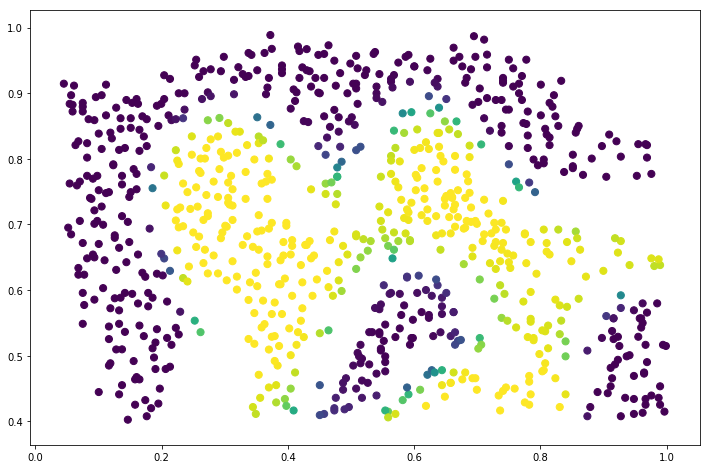

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X2[:, 0], X2[:, 1], s = 50, c = probs)

Again, dark yellow and purple above indicate negative and positive examples, respectively. The greens and blues denote the support vectors, that is, the data points that justified the creation of the decision boundary by being close to both negative and positive examples. 


## Dataset 3

In the next section, Andrew says:

Your task is to use the cross validation set Xval, yval to determine the
best C and sigma parameter to use. You should write any additional code necessary to help you search over the parameters C and sigma. For both C and sigma, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
Note that you should try all possible pairs of values for C and sigma (e.g., C = 0.3 and sigma = 0.1). For example, if you try each of the 8 values listed above for C and for sigma^2, you would end up training and evaluating (on the cross validation
set) a total of 8^2 = 64 different models.

Sounds like a nested for loop to me. Let's take a look.

In [85]:
data3 = loadmat('data/ex6data3.mat')

y3 = data3['y']
yval = data3['yval']
X3 = data3['X']
Xval = data3['Xval']

print('X3:', X3.shape)
print('y3:', y3.shape)
print('Xval', Xval.shape)
print('yval', yval.shape)

X3: (211, 2)
y3: (211, 1)
Xval (200, 2)
yval (200, 1)


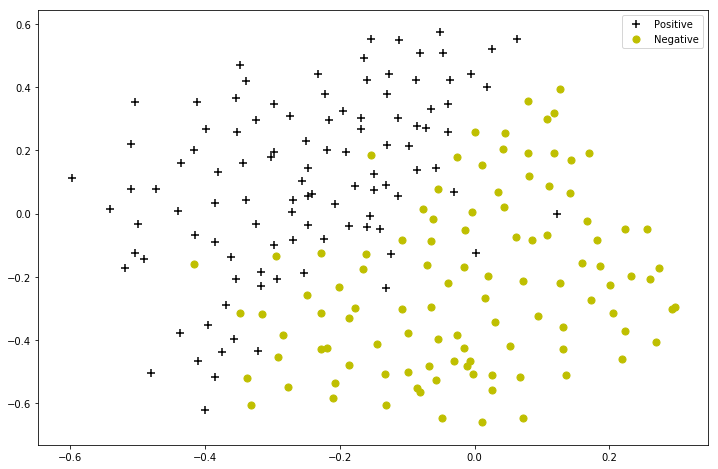

In [86]:
plotData(X3, y3)

So we just need to try all those different sigma and C values to see what combination yields the best model. Whatever model gives us the best result is the one we keep.

In [87]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
sigma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_score = 0; best_sigma = 0; best_C = 0

for c in C_values:
    for sigma in sigma_values:
        clf4 = SVC(C = c, kernel = 'poly', degree = 3, gamma = sigma, probability = True)
        clf4.fit(X3, y3.ravel())
        score = clf4.score(Xval, yval)
        
        if score > best_score:
            best_score = score; best_C = c; best_sigma = sigma

In [88]:
print(best_score)
print(best_C)
print(best_sigma)

0.93
0.03
100


In [89]:
clf4 = SVC(C = best_C, kernel = 'poly', degree = 3, gamma = best_sigma, probability = True)
clf4.fit(X3, y3.ravel())

SVC(C=0.03, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Alright, so those are the values that got us the best results. Now we can plot our SVM to see if it gives us a reasonable decision boundary.

Number of support vectors:  57


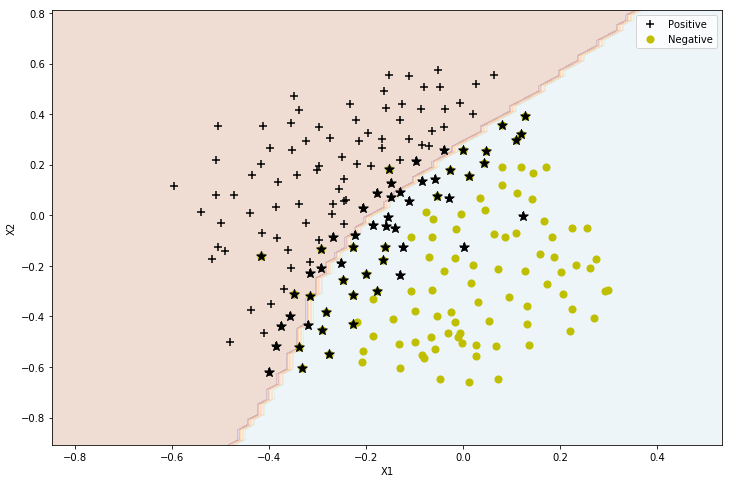

In [90]:
plotSVC(clf4, X3, y3)

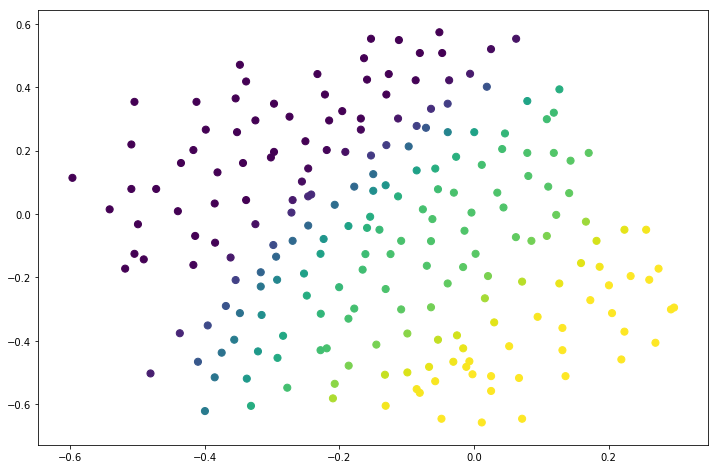

In [91]:
probs = clf4.predict_proba(X3)[:, 0].ravel()
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X3[:, 0], X3[:, 1], s = 50, c = probs)

While it doesn't prefectly classify every example, it looks pretty good to me!

## Spam classification

Now for the final task -a computational linguistics and natural language processing favorite- classifying emails as spam or not spam. Let's load up the data and take a look.

In [92]:
print("emailSample1.txt: \n")
with open("data/emailSample1.txt", "r") as f:
    print(f.read())

emailSample1.txt: 

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [93]:
print("emailSample2.txt: \n")
with open("data/emailSample2.txt", "r") as f:
    print(f.read())

emailSample2.txt: 

Folks,
 
my first time posting - have a bit of Unix experience, but am new to Linux.

 
Just got a new PC at home - Dell box with Windows XP. Added a second hard disk
for Linux. Partitioned the disk and have installed Suse 7.2 from CD, which went
fine except it didn't pick up my monitor.
 
I have a Dell branded E151FPp 15" LCD flat panel monitor and a nVidia GeForce4
Ti4200 video card, both of which are probably too new to feature in Suse's default
set. I downloaded a driver from the nVidia website and installed it using RPM.
Then I ran Sax2 (as was recommended in some postings I found on the net), but
it still doesn't feature my video card in the available list. What next?
 
Another problem. I have a Dell branded keyboard and if I hit Caps-Lock twice,
the whole machine crashes (in Linux, not Windows) - even the on/off switch is
inactive, leaving me to reach for the power cable instead.
 
If anyone can help me in any way with these probs., I'd be really grateful -
I

Okay, so these emails are quite dirty so we need to do some text preprocessing. Andrew Ng suggests we do the following, which are pretty standard document cleaning techniques in the world of computational lingusitics and natural language processing:

__Lower-casing:__ the entire email is converted into lower case, so that captialization is ignored (e.g., IndIcaTE is treated the same as Indicate).

__Stripping HTML:__ All HTML tags are removed from the emails. Many emails often come with HTML formatting; we remove all the
HTML tags, so that only the content remains.

__Normalizing URLs:__ All URLs are replaced with the text "httpaddr".

__Normalizing Email Addresses:__ All email addresses are replaced with the text "emailaddr".

__Normalizing Numbers:__ All numbers are replaced with the text "number".

__Normalizing Currency Markers:__ All dollar signs ($) are replaced with the text "dollar".

__Stemming:__  Words are reduced to their stemmed form. For example, "discount", "discounts", "discounted" and "discounting" are all replaced with "discount". Sometimes, the stemmer actually strips off additional characters from the end, so "include", "includes", "included", and "including" are all replaced with "includ".

__Non-word Removal:__ Non-words and punctuation have been removed. All white spaces (tabs, newlines, spaces) have all been trimmed to a single space character.

This sounds like a job for regular expressions and the Porter Stemmer from NLTK (http://www.nltk.org/book/).

In [94]:
import re
import nltk, nltk.stem.porter

In [95]:
def preprocess(email):
 
    email = email.lower()
    email = re.sub('<[^<>]+>', ' ', email)
    email = re.sub('[0-9]+', 'number', email)
    email = re.sub('(http|https)://[^\s]*', 'httpadr', email)
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
    email = re.sub('[$]+', 'dollar', email)
    
    return email

Let's take a look at what our preprocessing function did to the sample emails from earlier.

In [96]:
print("emailSample1 preprocessed: \n")
print(preprocess(open("data/emailSample1.txt", "r" ).read()))

emailSample1 preprocessed: 

> anyone knows how much it costs to host a web portal ?
>
well, it depends on how many visitors you're expecting.
this can be anywhere from less than number bucks a month to a couple of dollarnumber. 
you should checkout httpadr or perhaps amazon ecnumber 
if youre running something big..

to unsubscribe yourself from this mailing list, send an email to:
emailaddr




In [97]:
print("emailSample2 preprocessed: \n")
print(preprocess(open("data/emailSample2.txt", "r" ).read()))

emailSample2 preprocessed: 

folks,
 
my first time posting - have a bit of unix experience, but am new to linux.

 
just got a new pc at home - dell box with windows xp. added a second hard disk
for linux. partitioned the disk and have installed suse number.number from cd, which went
fine except it didn't pick up my monitor.
 
i have a dell branded enumberfpp number" lcd flat panel monitor and a nvidia geforcenumber
tinumber video card, both of which are probably too new to feature in suse's default
set. i downloaded a driver from the nvidia website and installed it using rpm.
then i ran saxnumber (as was recommended in some postings i found on the net), but
it still doesn't feature my video card in the available list. what next?
 
another problem. i have a dell branded keyboard and if i hit caps-lock twice,
the whole machine crashes (in linux, not windows) - even the on/off switch is
inactive, leaving me to reach for the power cable instead.
 
if anyone can help me in any way with th

Now we need to stem and tokenize our preprocessed emails. Stemming is explained above. Tokenization is the process of breaking text documents (emails, sentences, books, whatever) down into their individual components, words (tokens).

In [98]:
def tokenize(email):
     
    stemmer = nltk.stem.porter.PorterStemmer()
    
    email = preprocess(email)
    
    tokens = re.split('[ \@\$\/\#\.\-\:\&\*\+\=\[\]\?\!\(\)\{\}\,\'\"\>\_\<\;\%]', email)
    
    token_list = []
    for token in tokens: 
        #remove non-alphanumerics
        token = re.sub('[^a-zA-Z0-9]', '', token)    
        stemmed_token = stemmer.stem(token)
        #remove empty tokens
        if not len(token): 
            continue            
      
        token_list.append(stemmed_token)
            
    return token_list

Which reduces our email to a list of tokens.

In [99]:
print(tokenize(open("data/emailSample2.txt", "r" ).read()))

['folk', 'my', 'first', 'time', 'post', 'have', 'a', 'bit', 'of', 'unix', 'experi', 'but', 'am', 'new', 'to', 'linux', 'just', 'got', 'a', 'new', 'pc', 'at', 'home', 'dell', 'box', 'with', 'window', 'xp', 'ad', 'a', 'second', 'hard', 'diskfor', 'linux', 'partit', 'the', 'disk', 'and', 'have', 'instal', 'suse', 'number', 'number', 'from', 'cd', 'which', 'wentfin', 'except', 'it', 'didn', 't', 'pick', 'up', 'my', 'monitor', 'i', 'have', 'a', 'dell', 'brand', 'enumberfpp', 'number', 'lcd', 'flat', 'panel', 'monitor', 'and', 'a', 'nvidia', 'geforcenumbertinumb', 'video', 'card', 'both', 'of', 'which', 'are', 'probabl', 'too', 'new', 'to', 'featur', 'in', 'suse', 's', 'defaultset', 'i', 'download', 'a', 'driver', 'from', 'the', 'nvidia', 'websit', 'and', 'instal', 'it', 'use', 'rpm', 'then', 'i', 'ran', 'saxnumb', 'as', 'wa', 'recommend', 'in', 'some', 'post', 'i', 'found', 'on', 'the', 'net', 'butit', 'still', 'doesn', 't', 'featur', 'my', 'video', 'card', 'in', 'the', 'avail', 'list', 'wh

Now we need setup our vocabulary which is a list of all the unique occurrences of each word that appears in our dataset. Pandas does this pretty well.

In [100]:
data4 = pd.read_table('data/vocab.txt', header = None)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
0    1899 non-null int64
1    1898 non-null object
dtypes: int64(1), object(1)
memory usage: 29.8+ KB


In [101]:
data4.head()

,0,1
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about


In [102]:
data4.tail()

,0,1
1894,1895,your
1895,1896,yourself
1896,1897,zdnet
1897,1898,zero
1898,1899,zip


Alternatively, we could use python's native dictionary functionality and set the key as the token and the value as the index in our file.

In [103]:
def vocabulary(file, reverse = False):
    vocab = {}
    with open(file) as f:
        for line in f:
            (value, key) = line.split()
            if reverse == False:
                vocab[key] = int(value)
            else:
                vocab[int(value)] = key
                
    return vocab

In [104]:
vocab = vocabulary("data/vocab.txt")
print("We have {0} words in our vocabulary.".format(len(vocab)))

We have 1899 words in our vocabulary.


At least the two values are consistent, so that's encouraging.

Now we need to create a function to index the location of a token in an email to its position in our vocab, which, as you may have noticed, is ordered alphabetically.

In [105]:
def indexer(email, vocab):
    tokens = tokenize(email)
    indices = [vocab[token] for token in tokens if token in vocab]
    return indices

Finally, we need to perform feature extraction which simply means converting our emails to n-dimensionaly vectors filled with 0s and 1s. A 1 indicates that a word in our vocabulary actually occurs in the email. The vectors must be n-dimensional where n is the number of words in our vocabulary, in our case that's 1899. As a side note, our vocabulary is quite small; supposedly Google uses a vocabulary size of near 1,000,000.

In [106]:
def featureExtractor(email, vocab):
    
    n = len(vocab)
    result = np.zeros((n, 1))
    indices = indexer(email, vocab)
    for i in indices:
        result[i] = 1
    return result

Now we can combine all our functions and take them for test drive.

In [53]:
email = open("data/emailSample1.txt", "r" ).read()
feature_vector = featureExtractor(email, vocab)

In [110]:
print("feature vector length: {0}".format(len(feature_vector)))
print("nonzero entries: {0}".format(sum(feature_vector == 1)[0]))

feature vector length: 1899
nonzero entries: 45


Which is what Andrew Ng told us to expect. 

Now let's actually use some SVMs to classify our emails! The assignment graciously provides us with data to to be used for spam classification. Let's load it up!

In [55]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

We can see that this data has been preprocessed and feature extracted, so that's nice. Now we just need to separate the datafile into our training and test data.

In [56]:
X4 = spam_train['X']
Xtest = spam_test['Xtest']
y4 = spam_train['y']
ytest = spam_test['ytest']

In [57]:
print('X4:', X4.shape)
print('y4:', y4.shape)
print('Xtest', Xtest.shape)
print('ytest', ytest.shape)

X4: (4000, 1899)
y4: (4000, 1)
Xtest (1000, 1899)
ytest (1000, 1)


Consistent with what we have above, our vocabular size is 1899. Now, however, we have 4000 training examples to be evaluated on 1000 test examples. Surprisingly, a linear SVM handles this data set quite well.

In [58]:
clf5 = SVC(C = 0.1, kernel = 'linear')
clf5.fit(X4, y4.ravel())

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
print('Training accuracy = {0}%'.format(np.round(clf5.score(X4, y4) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(clf5.score(Xtest, ytest) * 100, 2)))

Training accuracy = 99.82%
Test accuracy = 98.9%


That's pretty impressive! Well done us and well done scikit learn!

To end with, we can take a look at which words have the highest weights associated with them in the SVM. That is, to what words did our SVM associated the highest parameter values? Any email containing such words is likely to be classified as spam by our SVM. And vice versa: a low parameter value means the SVMs thinks it unlikely the word is indicative of spam.

In [60]:
vocab_reversed = vocabulary("data/vocab.txt", reverse=True)

indices = np.argsort(clf5.coef_, axis = None)[:: -1]
print("The top 20 words that indicate spam:")
print([vocab_reversed[i] for i in indices[:20]], '\n')
print("The bottom 20 words that indicate spam:")
print([vocab_reversed[x] for x in indices[-20:]], '\n')


The top 20 words that indicate spam:
['otherwis', 'clearli', 'remot', 'gt', 'visa', 'base', 'doesn', 'wife', 'previous', 'player', 'mortgag', 'natur', 'll', 'futur', 'hot', 'air', 'cv', 'script', 'wall', 'dollarac'] 

The bottom 20 words that indicate spam:
['check', 'command', 'sai', 'new', 'java', 'http', 'toll', 'xp', 'ratio', 'august', 'unsubscrib', 'useless', 'numberth', 'round', 'linux', 'datapow', 'wrong', 'urgent', 'that', 'spam'] 



Funnily enough, emails containing the word "spam" are not likely to be spam emails, according to our classifier.

That ends this demonstration! Thank you very much for reading, dear reader. I hope this was helpful to you.